## OLCPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/11_olc.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD?filepath=docs/notebooks/11_olc.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgridpandas/blob/main/docs/notebooks/11_olc.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgridpandas/11_olc.ipynb)

Full VgridPandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid in Python or CLI, use [vgrid](https://pypi.org/project/vgrid/) package. Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgridpandas
Uncomment the following line to install [vgridpandas](https://pypi.org/project/vgridpandas/).

In [1]:
# %pip install vgridpandas

### Latlon to OLC

In [2]:
import pandas as pd
from vgridpandas import olcpandas       
df = pd.read_csv('https://github.com/uber-web/kepler.gl-data/raw/master/nyctrips/data.csv')
df = df.head(100)
df = df.rename({'pickup_longitude': 'lon', 'pickup_latitude': 'lat'}, axis=1)[['lon', 'lat', 'passenger_count']]
resolution = 10
df = df.olc.latlon2olc(resolution)
df.head()

,lon,lat,passenger_count,olc,olc_res
0,-73.993896,40.750111,1,87G8Q224+2C,10
1,-73.976425,40.739811,1,87G8P2QF+WC,10
2,-73.968704,40.754246,5,87G8Q23J+MG,10
3,-73.863060,40.769581,5,87G8Q49P+RQ,10
4,-73.945541,40.779423,1,87G8Q3H3+QQ,10


### OLC to geo boundary

In [3]:
df = df.olc.olc2geo()
df.head()


,lon,lat,passenger_count,olc,olc_res,geometry
0,-73.993896,40.750111,1,87G8Q224+2C,10,"POLYGON ((-73.994 40.75, -73.99388 40.75, -73...."
1,-73.976425,40.739811,1,87G8P2QF+WC,10,"POLYGON ((-73.9765 40.73975, -73.97638 40.7397..."
2,-73.968704,40.754246,5,87G8Q23J+MG,10,"POLYGON ((-73.96875 40.75412, -73.96862 40.754..."
3,-73.863060,40.769581,5,87G8Q49P+RQ,10,"POLYGON ((-73.86312 40.7695, -73.863 40.7695, ..."
4,-73.945541,40.779423,1,87G8Q3H3+QQ,10,"POLYGON ((-73.94562 40.77938, -73.9455 40.7793..."


### (Multi)Linestring/ (Multi)Polygon to OLC

<Axes: >

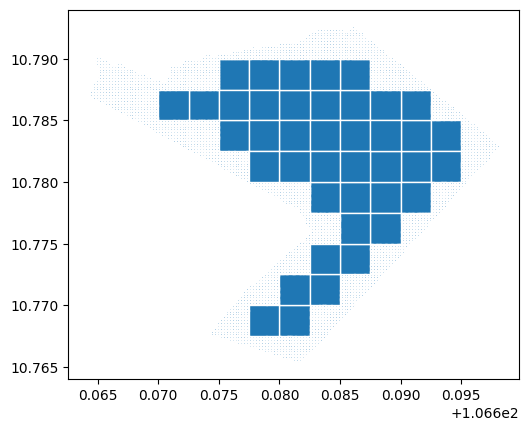

In [13]:
import geopandas as gpd
from vgridpandas import olcpandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon2.geojson')
resolution = 10
gdf_polyfill = gdf.olc.polyfill(resolution, predicate = "intersects", compact = True)
gdf_polyfill.head()
gdf_polyfill = gdf_polyfill.olc.olc2geo()
gdf_polyfill.plot(edgecolor = "white")

### OLC point binning

<Axes: >

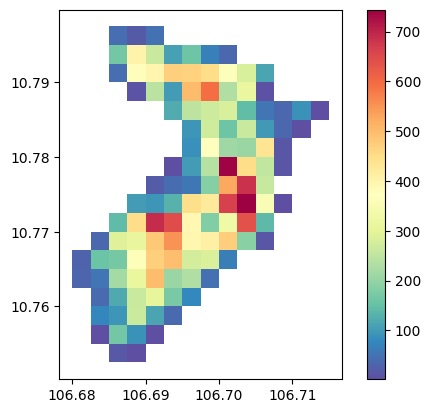

In [5]:
from vgridpandas import olcpandas
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
resolution = 8
stats = "count"
df_bin = df.olc.olcbin(resolution=resolution, stats = stats, 
                                # numeric_column="confidence",
                                # category_column="category",
                                return_geometry=True)
df_bin.plot(        
    column=stats,        # numeric column to base the colors on
    cmap='Spectral_r',        # color scheme (matplotlib colormap)
    legend=True,  
    linewidth=0.2          # boundary width (optional)
)
